# Laboratorio 2
Juan José Osorio - 202021720

Pablo Guatibonza - 202014393

Juan Sebastián Hoyos - 201822167


## 1. Entendimiento de los datos
### 1.1 Importación de librerías

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from joblib import dump,load
import warnings
warnings.filterwarnings('ignore')


### 1.2 Carga de los datos

In [69]:
df_original = pd.read_csv(
    'data/MotorAlpes_data.csv',
    sep=',',
    encoding='utf-8',
    index_col=0)
df_motorAlpes = df_original.copy()


In [70]:
# Dataframe más pequeño para pruebas
df_motorAlpes_new = pd.read_csv(
    'data/MotorAlpes_test.csv',
    sep=',',
    encoding='utf-8',
    index_col=0
)

### 1.3 Entendimiento de los datos

In [71]:
df_motorAlpes.shape

(7115, 11)

In [72]:
df_motorAlpes_new.shape

(791, 10)

In [73]:
df_motorAlpes.head()

,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power,selling_price
0,NaN,145500.0,NaN,Individual,5.0,Diesel,Manual,23.40,1248.0,74.00,5451.90
1,2014.0,120000.0,Second Owner,Individual,5.0,Diesel,Manual,21.14,1498.0,103.52,4482.68
2,2006.0,140000.0,Third Owner,Individual,5.0,Petrol,Manual,17.70,13524.0,78.00,1914.22
3,2010.0,127000.0,First Owner,Individual,5.0,Diesel,Manual,23.00,NaN,NaN,2725.95
4,2007.0,120000.0,First Owner,Individual,5.0,Petrol,Manual,16.10,1298.0,88.20,1574.99


In [74]:
df_motorAlpes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7115 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6876 non-null   float64
 1   km_driven      6917 non-null   float64
 2   owner          6876 non-null   object 
 3   seller_type    7115 non-null   object 
 4   seats          7115 non-null   float64
 5   fuel           7115 non-null   object 
 6   transmission   7115 non-null   object 
 7   mileage        6917 non-null   float64
 8   engine         6835 non-null   float64
 9   max_power      6847 non-null   float64
 10  selling_price  6714 non-null   float64
dtypes: float64(7), object(4)
memory usage: 667.0+ KB


In [75]:
df_motorAlpes.describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


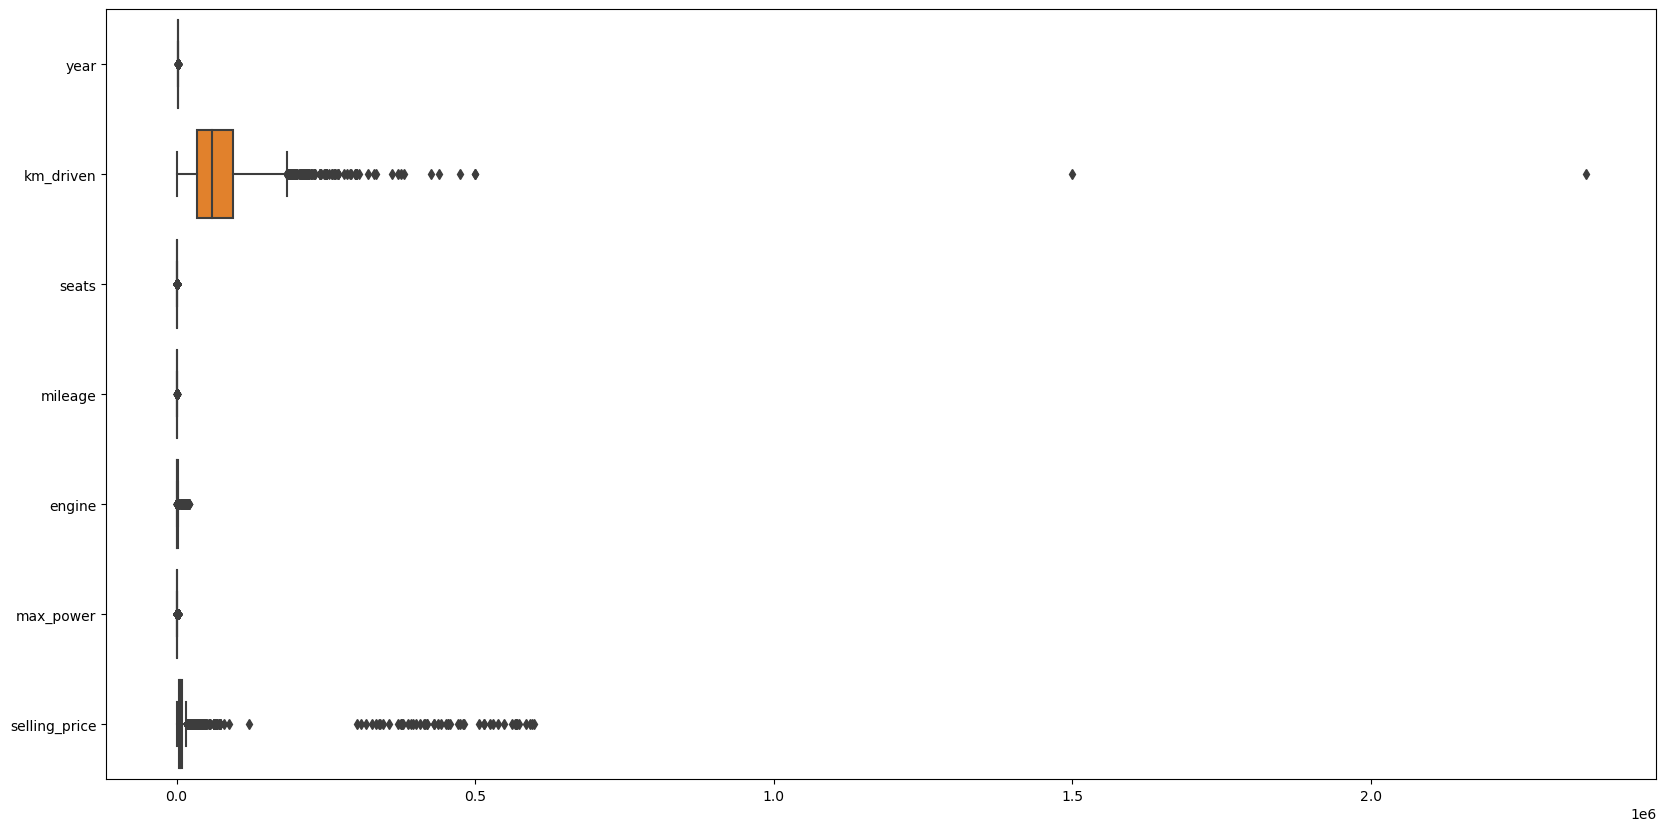

In [76]:
# Visualización de las variables numéricas
fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df_motorAlpes, orient='h')

In [77]:
# Información de las variables numéricas
variablesNumericas = [
    'year',
    'km_driven',
    'seats',
    'mileage',
    'engine',
    'max_power',
    'selling_price'
]

df_motorAlpes[variablesNumericas].describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


## 2. Identificación de las variables a utilizar


In [78]:
"""
La variable a utilizar es 'selling_price'
"""

df_motorAlpes['selling_price'].describe()

count      6714.000000
mean      11261.208041
std       40765.694516
min           1.910000
25%        3210.560000
50%        5451.900000
75%        8480.740000
max      598983.440000
Name: selling_price, dtype: float64

## 3. Preparación de los datos
### 3.1 Completitud

In [79]:
# Variables definidas de forma conjunta con el experto
features = ['year', 'engine', 'max_power', 'mileage', 'km_driven']

In [80]:
# Se calcula el porcentaje de los valores nulos por columna
(df_motorAlpes.isnull().sum()*100 / df_motorAlpes.shape[0]).sort_values(ascending=False)

selling_price    5.635980
engine           3.935348
max_power        3.766690
year             3.359100
owner            3.359100
km_driven        2.782853
mileage          2.782853
seller_type      0.000000
seats            0.000000
fuel             0.000000
transmission     0.000000
dtype: float64

Para las regresiones lineales, es necesario trabajar con variables numéricas. En este caso vamos unicamente a seleccionarlas, pero recuerde que existen técnicas para convertir variables categóricas a numéricas que también funcionan en este contexto

In [81]:
"""
Se va a tomar la variable "selling_price" como la variable objetivo
"""

# Se eliminan las filas donde selling_price es nulo
df_motorAlpes.dropna(subset=['selling_price']+features, inplace=True) # Se modifica el dataframe 
df_motorAlpes_new = df_motorAlpes_new.dropna(subset=features) # Se modifica el dataframe

In [82]:
df_motorAlpes.shape

(6045, 11)

In [83]:
df_motorAlpes_new.shape

(713, 10)

Limpieza del detaframe teniendo en cuenta la variable "selling_price"

In [84]:
# Se calcula el porcentaje de los valores nulos por columna, selling_price está en 0
(df_motorAlpes.isnull().sum()*100 / df_motorAlpes.shape[0]).sort_values(ascending=False)

year             0.0
km_driven        0.0
owner            0.0
seller_type      0.0
seats            0.0
fuel             0.0
transmission     0.0
mileage          0.0
engine           0.0
max_power        0.0
selling_price    0.0
dtype: float64

### 3.2 Búsqueda de relaciones entre variables (diagramas de dispersión)

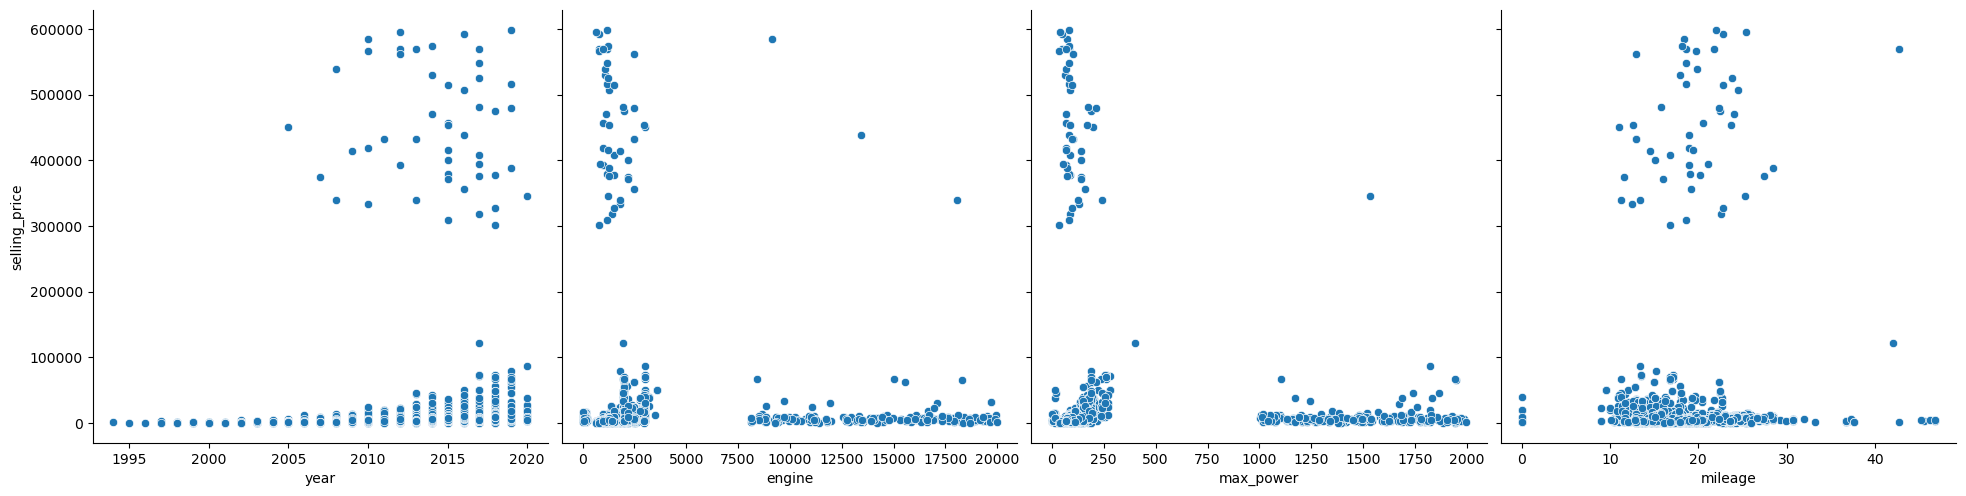

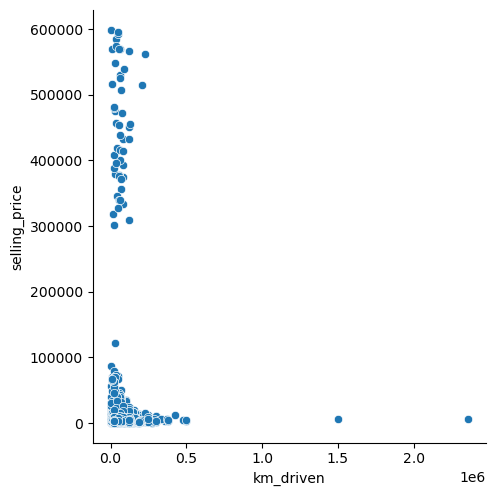

In [85]:
"""
Relación de selling_price con otras variables
"""
sns.pairplot(df_motorAlpes, height=5, y_vars='selling_price', x_vars=features[:4], kind='scatter')
sns.pairplot(df_motorAlpes, height=5, y_vars='selling_price', x_vars=features[4:], kind='scatter')

De las gráficas anteriores vemos que unos buenos candidatos son:
- year
- km_driven
- engine

### 3.3 Búsqueda de relaciones entre variables (Matriz de correlaciones)
Buscamos cuáles de las columnas tiene una relación con danceability pero ahora utilizando correlaciones

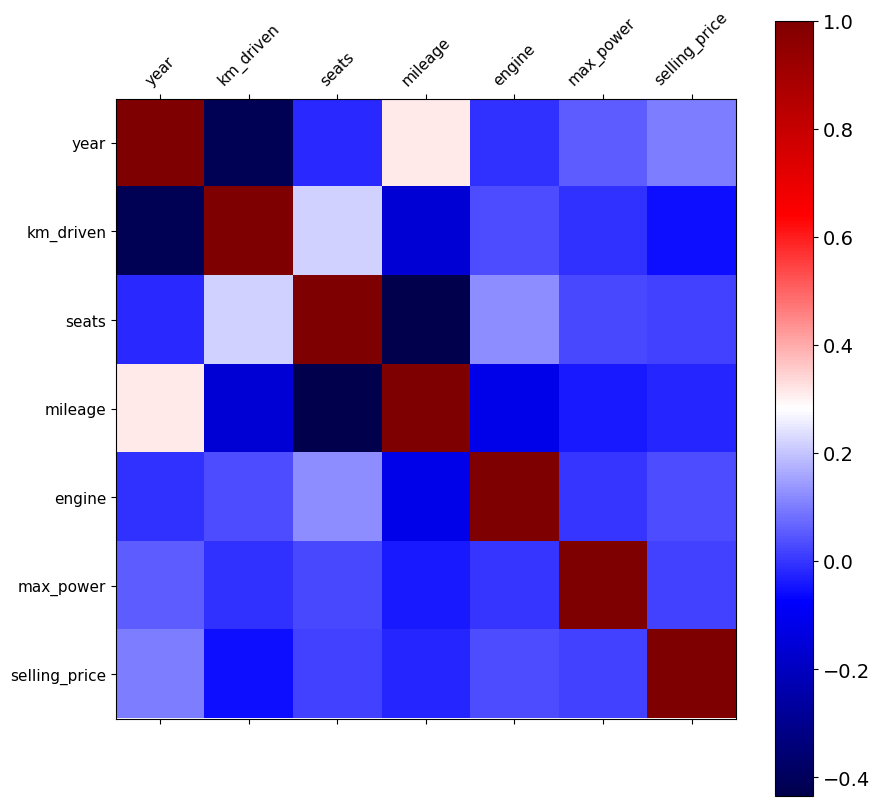

In [86]:
f = plt.figure(figsize=(10, 10))
df_float = df_motorAlpes.select_dtypes(['float64'])

plt.matshow(df_float.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_float.select_dtypes(['float64']).shape[1]), df_float.select_dtypes(['float64']).columns, fontsize=11, rotation=45)
plt.yticks(range(df_float.select_dtypes(['float64']).shape[1]), df_float.select_dtypes(['float64']).columns, fontsize=11)

cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)


## 4. Modelamiento
### 4.1 Regresión Básica
Realizamos una regresión básica y luego la utilizamos para asignar la columna *selling_price* de los datos recientes.

Se quiere generar un unico modelo que podamos exportar y que pueda ser usado en producción para asignar nuevos valores

In [87]:

X_train, X_test, y_train, y_test = train_test_split(df_motorAlpes[features], df_motorAlpes['selling_price'], test_size=0.3, random_state=1)

In [88]:
X_train.shape, y_train.shape

((4231, 5), (4231,))

In [89]:
X_test.shape, y_test.shape

((1814, 5), (1814,))

Entrenamiento del modelo

In [90]:
regression = LinearRegression()

In [91]:
regression.fit(X_train, y_train)

LinearRegression()

### 4.2 Interpretación de los coeficientes y del intercepto
Los coeficientes de la regresión brindan una intuición del impacto o la fuerza de una característica en la predicción/estimación de la variable objetivo.

In [92]:
pd.DataFrame({'columns': features, 'coeficientes': regression.coef_})

,columns,coeficientes
0,year,1231.506865
1,engine,0.699109
2,max_power,0.228390
3,mileage,-668.223865
4,km_driven,-0.009640


Note que las características ("features") se encuentran en diferentes escalas, rangos o grados de magnitud, razón por la cuál la interpretación de los coeficientes puede no ser la correcta. Si bien este no es el escenario, otro posible problema del uso de características en diferentes escalas es que el modelo se puede sesgar hacia las que tienen mayores escalas, basando su estimación mayoritariamente en estas y tendiendo a descartar las otras.

Por otro lado, el intercepto suele ser útil para determinar un valor de base en la estimación, en este caso un nivel mínimo de `selling_price` incluso si todas las características tuvieran valores iguales a cero.

In [93]:
regression.intercept_

-2456369.3741641766

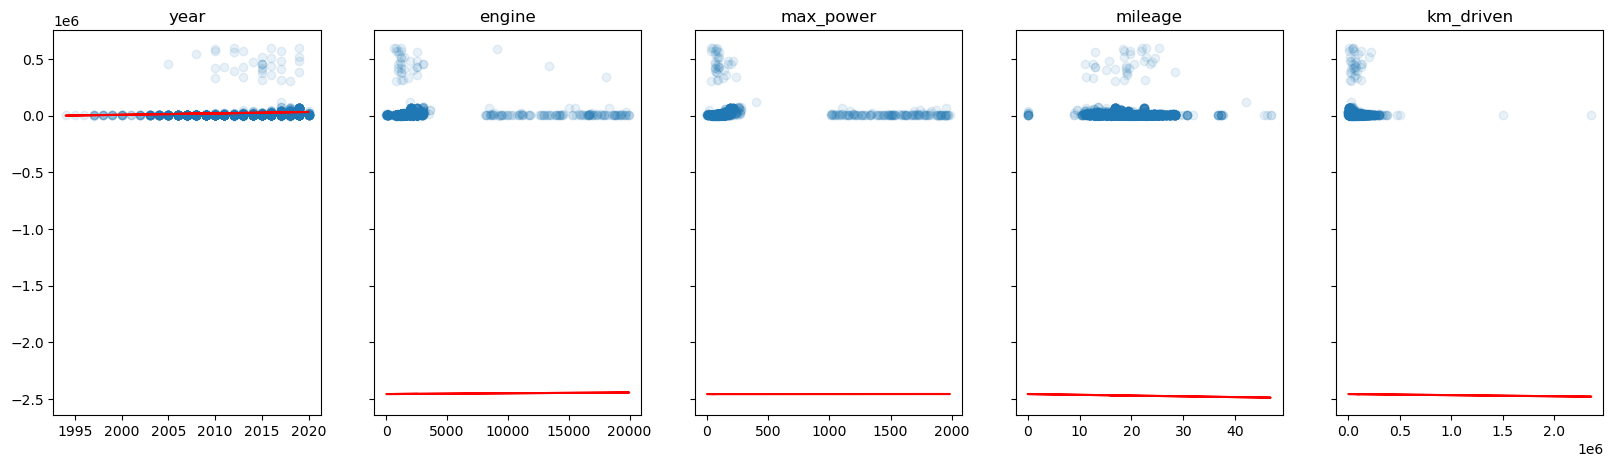

In [94]:
f, axs = plt.subplots(1, len(features), figsize=(20, 5), sharey=True)

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, 'o', alpha=0.1)
    axs[i].plot(x, m*x + b, 'r')
    axs[i].set_title(col)



## 5. Evaluación cuantitativa
**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [95]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 10204.409067607048
Test: 10040.154796196528


**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

**Revisa la métrica MAPE**, puede ser muy interesante para explicar mejor a un experto el resultado.

In [96]:
print("Train:", mean_squared_error(y_train, regression.predict(X_train)))
print("Test:", mean_squared_error(y_test, regression.predict(X_test)))

Train: 1790463592.829145
Test: 1646894601.6025708


Análisis de error

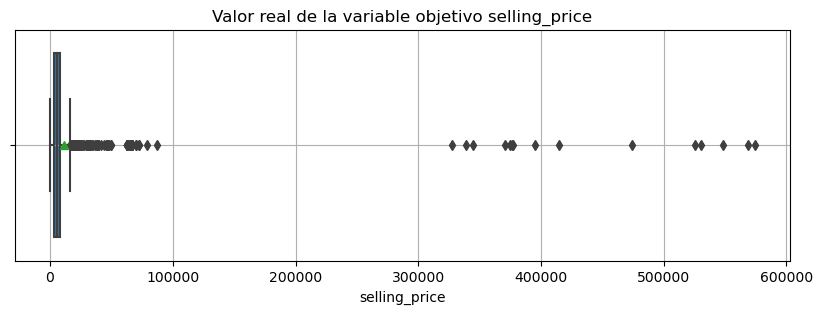

In [97]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=y_test, showmeans=True, orient='h')
plt.title('Valor real de la variable objetivo selling_price')
plt.grid()
plt.show()

In [98]:
y_test.describe()

count      1814.000000
mean      11324.929719
std       40844.939588
min          28.500000
25%        3149.990000
50%        5451.900000
75%        8480.740000
max      574092.810000
Name: selling_price, dtype: float64

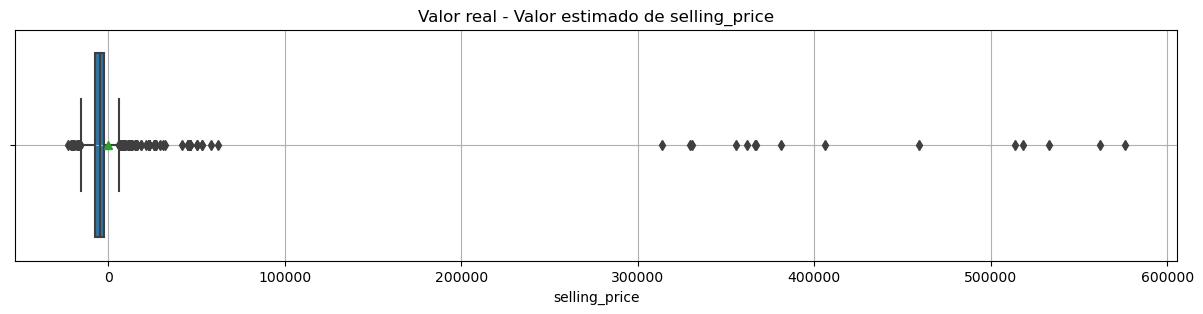

In [99]:
plt.figure(figsize = (15, 3))
sns.boxplot(x = (y_test - regression.predict(X_test)), showmeans = True, orient = 'h')
plt.title('Valor real - Valor estimado de selling_price')
plt.grid()
plt.show()

In [100]:
abs(y_test - regression.predict(X_test)).describe()

count      1814.000000
mean      10040.154796
std       39331.192114
min           4.969506
25%        3003.427445
50%        5440.073452
75%        8254.518230
max      575740.289209
Name: selling_price, dtype: float64

Se podría decir que los resultados de este primer modelo son aceptables dado que:
1) Las métricas de error para el dataset de entrenamiento y prueba son muy similares. No se evidencian problemas de sobreajuste (overfitting). El sobreajuste sucede cuando el modelo es muy complejo. Un modelo es complejo cuando hay una gran variedad de parametros en comparación con la cantidad de observaciones que se tiene. Debido a esto, el modelo no podrá aplicarse sobre datos nuevos, es decir, servirá para los datos de prueba, pero para los tests
2) Para el conjunto de prueba los valores de la variable objetivo están centrados en 11324 dolares, con una desviación estandar de 40844 dolares, mientras que el 50% de los errores de estimación del modelo se encuentran  en $\pm 5440$ dolares 

## 6. Evaluación cualitativa

### 6.1 Entrenamiento de un segundo modelo usando normalización

Para poder realizar la evaluación cualitativa, es necesario normalizar los coeficientes obtenidos en la regresión. De esta manera se puede establecer correctamente una relación entre ellos. 

In [101]:

pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]
)

In [102]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [103]:
pd.DataFrame({'columns': features, 'coef': pipeline['model'].coef_})

,columns,coef
0,year,4783.810777
1,engine,1645.263952
2,max_power,59.585075
3,mileage,-2853.823056
4,km_driven,-611.745876


In [104]:
pipeline['model'].intercept_


11462.366187662534

In [105]:
print('MAE:')
print('Train:', mean_absolute_error(y_train, pipeline.predict(X_train)))
print('Test:', mean_absolute_error(y_test, pipeline.predict(X_test)))
print('\nRMSE:')
print('Train:', np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 10204.409067607314
Test: 10040.154796196806

RMSE:
Train: 42313.86998171102
Test: 40581.9492090088


Si bien las métricas de error no presentan cambios importantes, los coeficientes del modelo de regresión pueden ser comparados directamente dado que todas las características se encuentran en la misma escala.

Como los datos ya están normalizados, se pueden hacer varias afirmaciones sobre los coeficientes. En primer lugar, el coeficiente que mas aporta es el de year, el cual quiere decir que entre mas reciente sea un vehículo, este será mas caro. Por otro lado, están los coeficientes de mileage y km_driven, los cuales aportan negativamente al precio del vehículo. Mileage es la característica que mas afecta negativamente al precio, pues indica la cantidad de kilometros que se pueden hacer por litro de gasolina. De la misma manera, la característica km_driven indica que entre mas kilometros se haya conducido el carro, este será mas barato. Finalmente, la características engine y max_power ayudan a mejorar el precio del carro, pues para engine entre mas centimetros cúbicos tenga el vehículo, mayor es su precio. De la misma manera sucede con max_power. Sin embargo, su coeficiente es tan pequeño que no aporta de manera considerable al precio del carro.

En conclusión, todas las variables usadas anteriormente son importantes para el desarollo del modelo, a excepción de max_power, pues su coeficiente es muy pequeño en comparación al de los demas.

### 6.2 Validación de supuestos de la regresión 

Paso importante para poder intrerpretar de manera apropiada el modelo construido
#### 6.2.1 Colinealidad 

Es necesario que las columnas no tengan( o tengan muy poca ) colinealidad.


<AxesSubplot: >

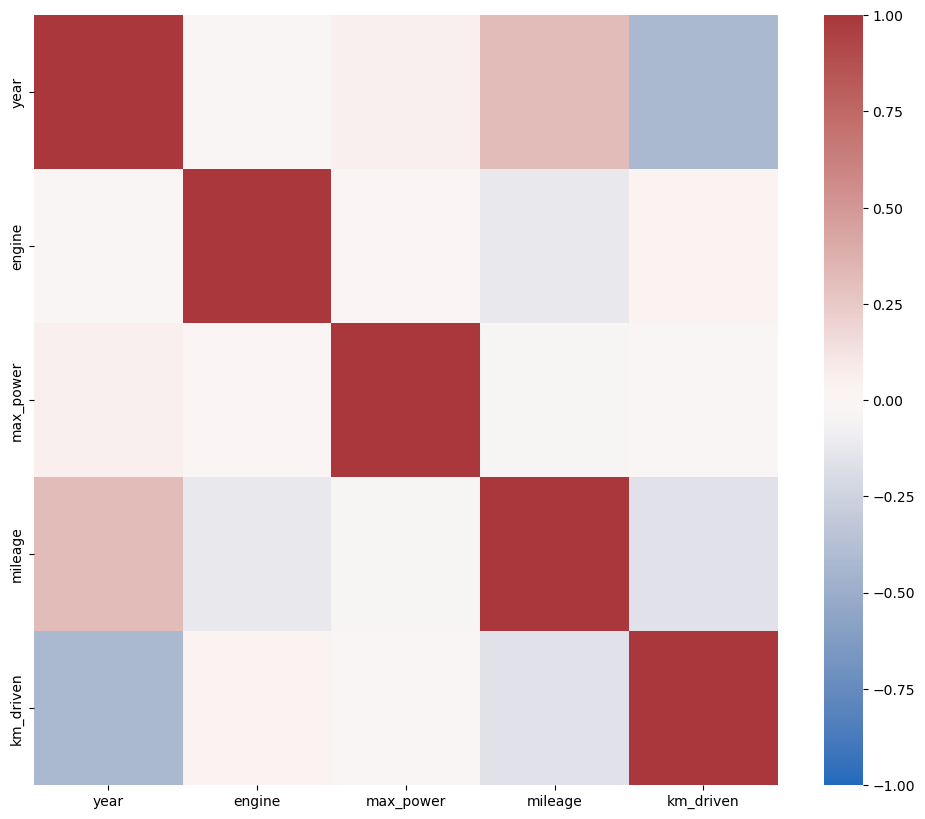

In [106]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_motorAlpes[features].corr(), cmap = 'vlag', vmin = -1, vmax = 1)

Como se puede ver, no hay correlación entre las columnas, pues según el diagrama de calor, cuando las columnas están relacionadas, su color tiende a un rojo o azul, pero en la anterior grafica los colores tienden al blanco, el cual indica que no hay relación

#### 6.2.2 Linealidad

Es necesario que la relación entre cada variable explicativa y la varable objetivo sea lineal. Muchas veces la mejor forma de comprobarlo es visualmente:  

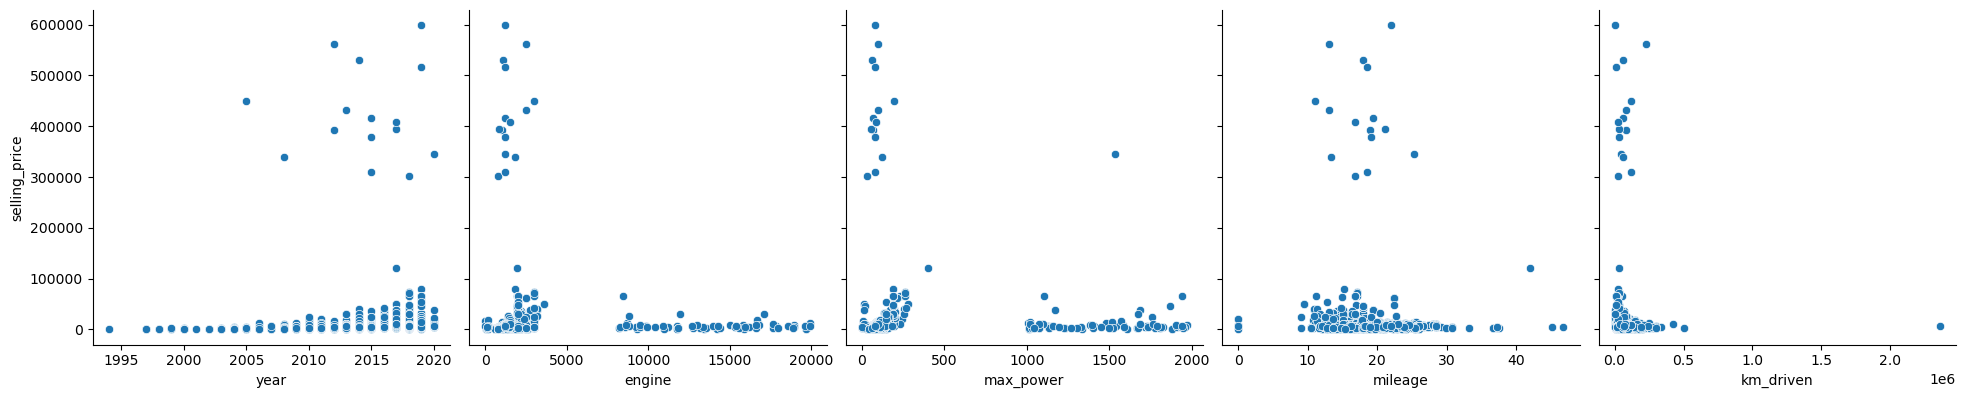

In [107]:
sns.pairplot(df_motorAlpes.sample(2000), height = 4, y_vars = 'selling_price', x_vars = features, kind = 'scatter')

¿ Es posible que haya una relación no lineal entre year y selling price ? 

In [108]:

pipeline = Pipeline(
    [
        ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]
)

In [109]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [110]:
print('MAE:')
print('Train:', mean_absolute_error(y_train, pipeline.predict(X_train)))
print('Test:', mean_absolute_error(y_test, pipeline.predict(X_test)))
print('\nRMSE:')
print('Train:', np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 9578.880968972122
Test: 9536.901331478362

RMSE:
Train: 42039.50577733715
Test: 40302.819424546855


En comparación a los datos obtenidos en la evaluación cuantitativa, hay una reducción de error, por lo que se podría asumir una relación no lineal entre year y selling price

#### 6.2.3 Normalidad en los errores

Otro supuesto de la regresión lineal es que los errores tienen una distribución normal. Para esto se puede usar:
* Grafico de dispersión entre los errores y el valor predicho
* Grafico Q-Q

In [111]:
errors = (pipeline.predict(X_train) - y_train).values

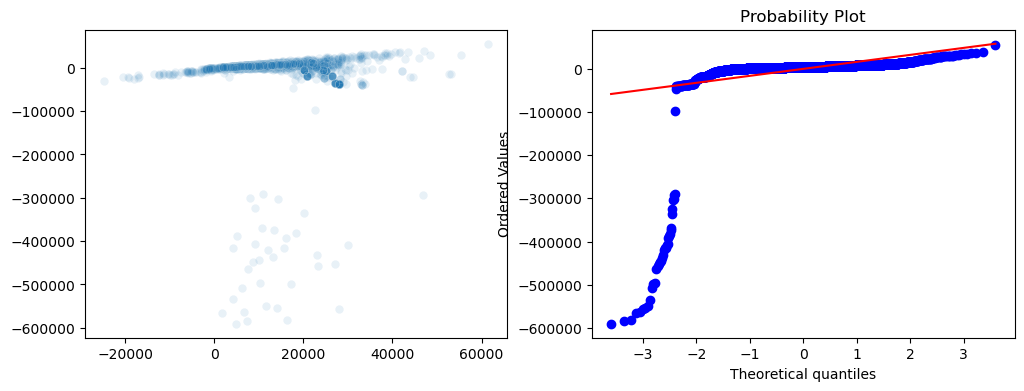

In [112]:



fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Dispersión
sns.scatterplot(x = pipeline.predict(X_train), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist = 'norm', plot = axes[1])

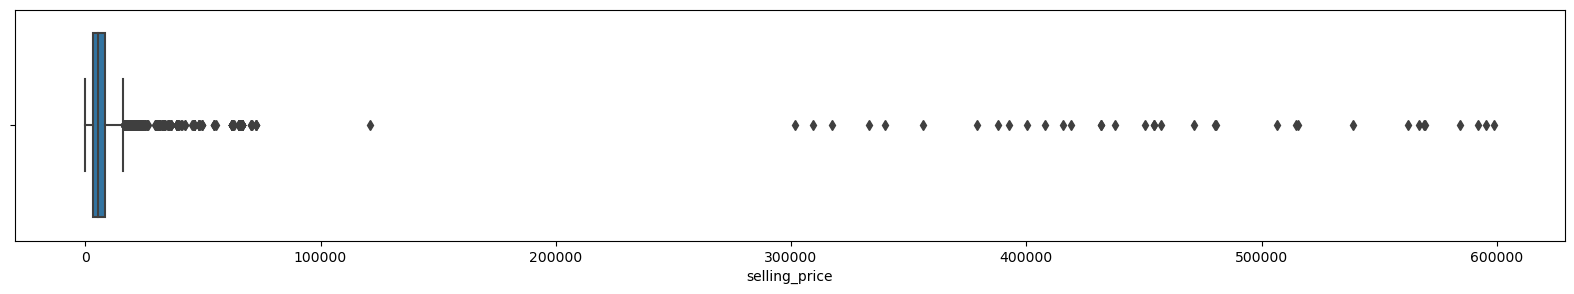

In [113]:
plt.figure(figsize = (20, 3))
ax = sns.boxplot(x=y_train, orient = 'h')

In [114]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mask = (df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)
    return df[mask]

In [115]:
df_motorAlpes_outliers=remove_outliers(df_motorAlpes,'selling_price')

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df_motorAlpes_outliers[features], df_motorAlpes_outliers['selling_price'], test_size = 0.3, random_state = 1)


In [117]:
pipeline = Pipeline(
    [
        ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]
)


In [118]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [119]:
print('MAE:')
print('Train:', mean_absolute_error(y_train, pipeline.predict(X_train)))
print('Test:', mean_absolute_error(y_test, pipeline.predict(X_test)))
print('\nRMSE:')
print('Train:', np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 1579.9754532604413
Test: 1585.1174074666867

RMSE:
Train: 2139.5167824975465
Test: 2236.286382919664


Como se puede ver, los errores se disminuyeron de una manera considerable sin los outliers

#### 6.2.4 Varianza constante(Homocedasticidad)

Este supuesto exige que la varianza en los errores se mantenga constante a medida que varia la variable objetivo. Al igual que los otros supuestos, la mejor forma de identificarlo es visualmente, graficando la variable objetivo contra los errores. 

In [120]:
errors = (pipeline.predict(X_train) - y_train).values

<AxesSubplot: xlabel='selling_price'>

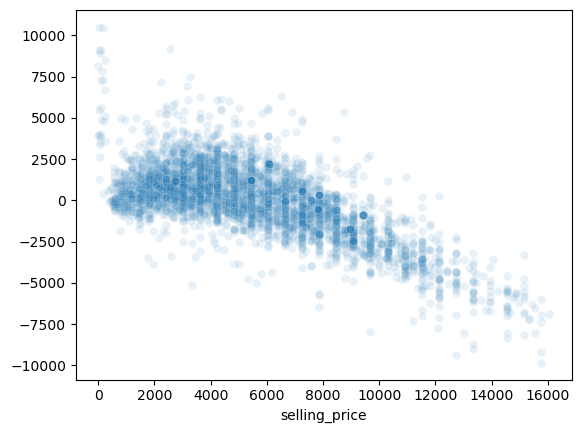

In [121]:
sns.scatterplot(x = y_train, y = errors, alpha = 0.1)

Una mala grafica puede indicar que se necesita una transformación, o que hace falta una variable extra.

In [122]:
features2=['year','km_driven','seats','mileage','engine','max_power']
#Se agrega el feature seats para revisar si se puede mejorar la grafica para la varianza constante

X_train, X_test, y_train, y_test = train_test_split(df_motorAlpes_outliers[features2], df_motorAlpes_outliers['selling_price'], test_size = 0.3, random_state = 1)

In [123]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [124]:
errors = (pipeline.predict(X_train) - y_train).values

<AxesSubplot: xlabel='selling_price'>

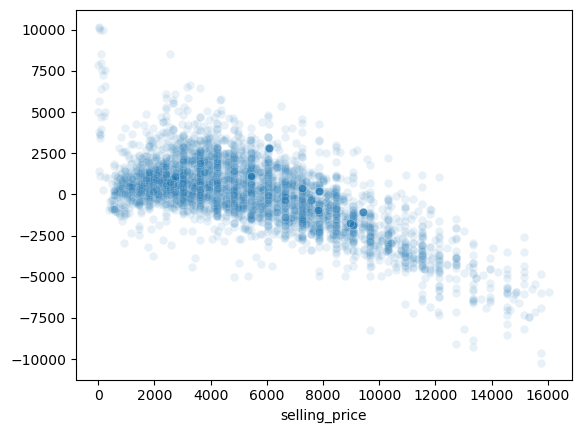

In [125]:
sns.scatterplot(x = y_train, y = errors, alpha = 0.1)

Lo anterior indica que al añadir otra columna, la varianza deja de ser tan constante como en la grafica anterior. Por lo tanto, no hay que incluir la variable seats

Ahora se intentara solo con 2 variables, las cuales son year y km_driven

In [126]:
features3=['year','km_driven']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df_motorAlpes_outliers[features3], df_motorAlpes_outliers['selling_price'], test_size = 0.3, random_state = 1)

In [128]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [129]:
errors = (pipeline.predict(X_train) - y_train).values

<AxesSubplot: xlabel='selling_price'>

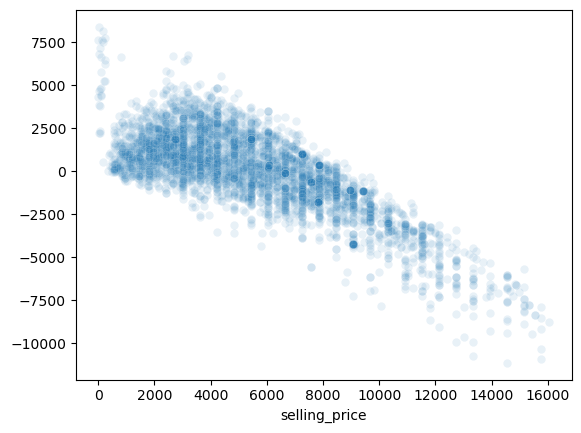

In [130]:
sns.scatterplot(x = y_train, y = errors, alpha = 0.1)

En este caso, se puede ver que la varianza tiende a ser mas constante que en los casos anteriores. Por lo tanto, es apropiado solo tomar las caracteristicas year y km_driven

## 7. Persistencia del modelo y estimación para el nuevo conjunto de datos

In [131]:
filename = 'model.joblib'

In [132]:


dump(pipeline, filename)

['model.joblib']

In [133]:
pipeline_loaded = load(filename)

In [134]:
df_motorAlpes_new['selling_price'] = pipeline_loaded.predict(df_motorAlpes_new[features])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- engine
- max_power
- mileage


<AxesSubplot:xlabel='selling_price', ylabel='Count'>

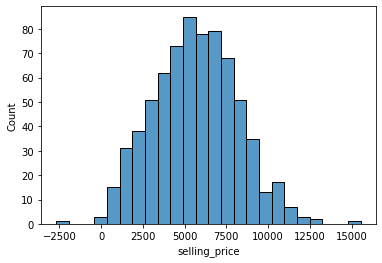

In [ ]:
sns.histplot(df_motorAlpes_new['selling_price'])

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

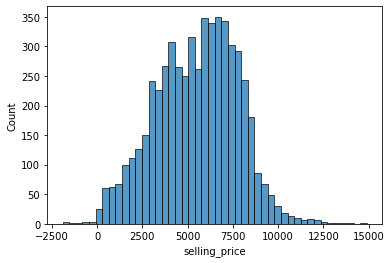

In [ ]:
sns.histplot(df_motorAlpes_outliers['selling_price'])

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

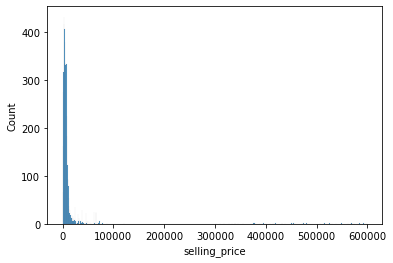

In [ ]:
sns.histplot(df_motorAlpes['selling_price'])